# PREDICTION WITH ARIMA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima.model import ARIMA
 

In [3]:
# read dataset may2023
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/combined_may2023.pkl")  

In [4]:
df

,MEM_USAGE,CPU_USAGE,PS1_V,TEMP
0,35.555417,27.343750,5.435294,28.687
1,35.555417,6.367041,5.435294,28.687
2,35.555417,7.142857,5.435294,28.687
3,35.555417,27.306273,5.435294,28.687
4,35.555417,5.639098,5.435294,28.687
...,...,...,...,...
3798,25.962425,8.396947,5.383530,29.562
3799,25.962425,6.766917,5.383530,29.562
3800,25.962425,6.000000,5.383530,29.562
3801,25.962425,8.045977,5.383530,29.562


In [73]:
LAG = 12   # ---------- 1H

In [56]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# TEMP

In [57]:
training_size = int(len(df) * 0.8)

train = [[i] for i in df["TEMP"]][:training_size]
test = [[i] for i in df["TEMP"]][training_size:]

len(train)


2986

In [59]:
arima = ARIMA(train, order=(LAG,0,0))
arima_fit = arima.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2986
Model:                ARIMA(12, 0, 0)   Log Likelihood               -1211.768
Date:                Thu, 25 May 2023   AIC                           2451.536
Time:                        15:01:07   BIC                           2535.560
Sample:                             0   HQIC                          2481.766
                               - 2986                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1354      2.420     10.799      0.000      21.392      30.879
ar.L1          0.6926      0.005    138.863      0.000       0.683       0.702
ar.L2          0.1343      0.003     38.752      0.0

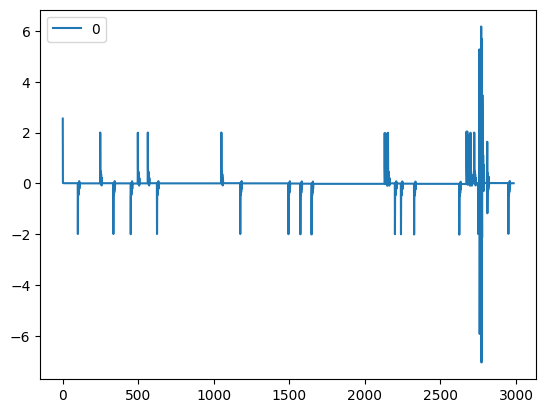

In [60]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()

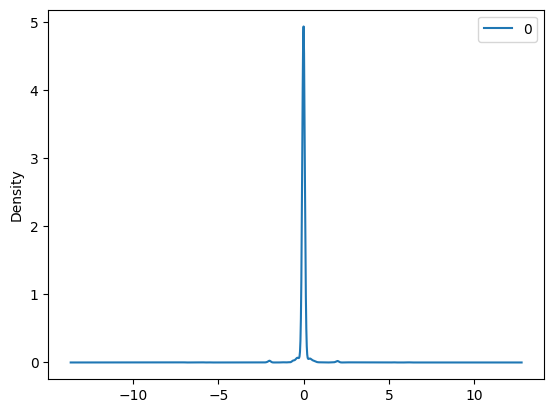

                 0
count  2986.000000
mean     -0.002585
std       0.365788
min      -7.048656
25%      -0.016902
50%       0.001711
75%       0.001711
max       6.177039


In [61]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [62]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    output = arima_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted', yhat, obs)    
    # print('actual', obs)

Test MAPE: 4.497
Test RMSE: 2.915


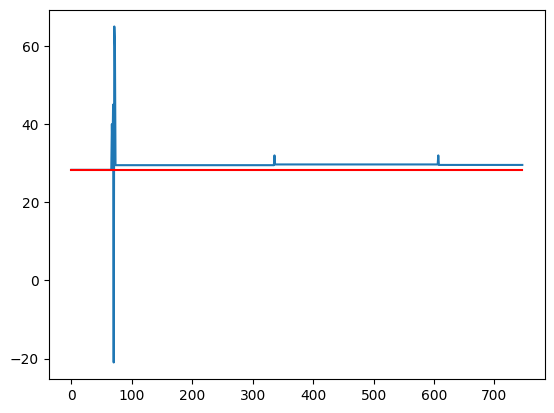

In [63]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# CPU

In [64]:
training_size = int(len(df) * 0.8)

train = [[i] for i in df["CPU_USAGE"]][:training_size]
test = [[i] for i in df["CPU_USAGE"]][training_size:]

arima = ARIMA(train, order=(LAG,0,0))
arima_fit = arima.fit()
print(arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2986
Model:                ARIMA(12, 0, 0)   Log Likelihood              -11431.464
Date:                Thu, 25 May 2023   AIC                          22890.929
Time:                        15:01:25   BIC                          22974.952
Sample:                             0   HQIC                         22921.159
                               - 2986                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9781      0.376     37.143      0.000      13.241      14.716
ar.L1         -0.0007      0.016     -0.045      0.964      -0.031       0.030
ar.L2          0.0124      0.017      0.713      0.4

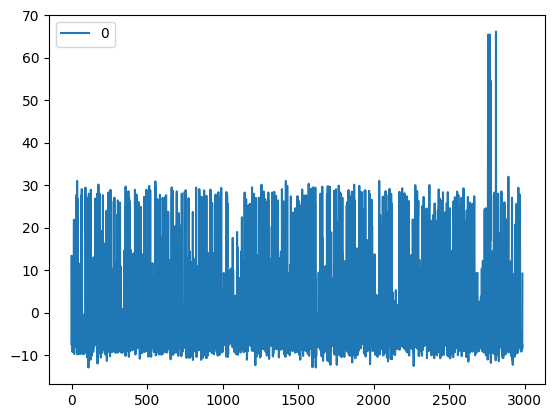

In [65]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()

In [66]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    output = arima_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted', yhat, obs)    
    # print('actual', obs)

Test MAPE: 76.357
Test RMSE: 13.574


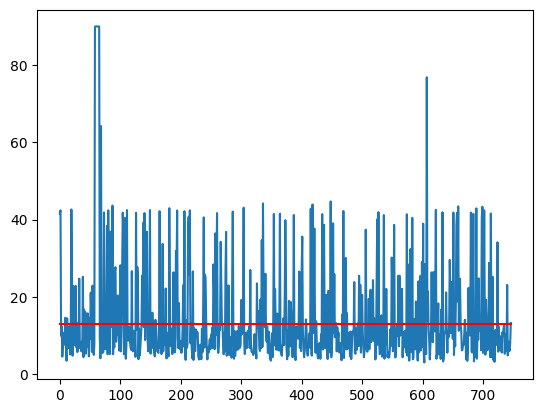

In [67]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# MEM_USAGE

In [69]:
training_size = int(len(df) * 0.8)

train = [[i] for i in df["CPU_USAGE"]][:training_size]
test = [[i] for i in df["CPU_USAGE"]][training_size:]

arima = ARIMA(train, order=(LAG,0,0))
arima_fit = arima.fit()
print(arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2986
Model:                ARIMA(12, 0, 0)   Log Likelihood              -11431.464
Date:                Thu, 25 May 2023   AIC                          22890.929
Time:                        15:01:53   BIC                          22974.952
Sample:                             0   HQIC                         22921.159
                               - 2986                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9781      0.376     37.143      0.000      13.241      14.716
ar.L1         -0.0007      0.016     -0.045      0.964      -0.031       0.030
ar.L2          0.0124      0.017      0.713      0.4

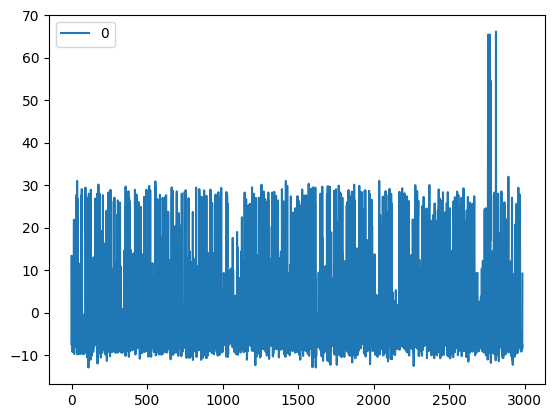

In [70]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()

In [71]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    output = arima_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted', yhat, obs)    
    # print('actual', obs)

Test MAPE: 76.357
Test RMSE: 13.574


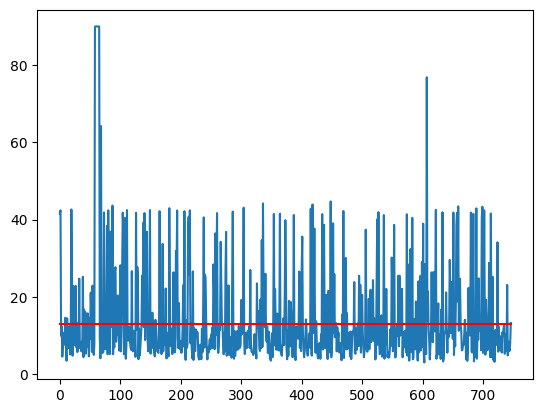

In [72]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()